### Restaurant rating prediction System

#### import required packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc 
import warnings  #supressing warnings
warnings.filterwarnings('ignore')

#### Load the data

In [3]:
ind_hotels = pd.read_csv('./india_all_restaurants_details.csv')

#### Exploratory Data Analysis

In [4]:
ind_hotels.columns

Index(['Unnamed: 0', 'sno', 'zomato_url', 'name', 'city', 'area', 'rating',
       'rating_count', 'telephone', 'cusine', 'cost_for_two', 'price_range',
       'address', 'coordinates', 'timings', 'online_order',
       'table_reservation', 'delivery_only', 'famous_food'],
      dtype='object')

In [5]:
ind_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197665 entries, 0 to 197664
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         187128 non-null  float64
 1   sno                187163 non-null  float64
 2   zomato_url         190927 non-null  object 
 3   name               190927 non-null  object 
 4   city               190927 non-null  object 
 5   area               190927 non-null  object 
 6   rating             190927 non-null  object 
 7   rating_count       190927 non-null  float64
 8   telephone          190927 non-null  object 
 9   cusine             190927 non-null  object 
 10  cost_for_two       190927 non-null  object 
 11  price_range        189240 non-null  float64
 12  address            189187 non-null  object 
 13  coordinates        190927 non-null  object 
 14  timings            189246 non-null  object 
 15  online_order       190927 non-null  object 
 16  ta

In [7]:
ind_hotels.describe

<bound method NDFrame.describe of         Unnamed: 0      sno  \
0             53.0     53.0   
1            166.0    166.0   
2            543.0    543.0   
3            712.0    712.0   
4            950.0    950.0   
...            ...      ...   
197660     83972.0  77943.0   
197661     83973.0  77944.0   
197662     83974.0  77945.0   
197663     83975.0  77946.0   
197664         NaN      NaN   

                                               zomato_url  \
0                        https://www.zomato.com/mskitchen   
1       https://www.zomato.com/kolkata/rajasthali-toll...   
2       https://www.zomato.com/kolkata/nourishef-the-t...   
3                     https://www.zomato.com/TrendzMumbai   
4       https://www.zomato.com/kolkata/garam-masala-da...   
...                                                   ...   
197660  https://www.zomato.com/manali/little-tibet-tib...   
197661  https://www.zomato.com/manali/om-shanti-cafe-t...   
197662  https://www.zomato.com/manali/city-c

#### Data cleansing

In [8]:
# Function to count the number of cuisines
def cuisine_counter(inpStr):
    NumCuisines=len(str(inpStr).split(','))
    return(NumCuisines)

In [10]:
# Creating a new feature in data
# We will further explore the new feature just like other features
ind_hotels['CuisineCount']=ind_hotels['cusine'].apply(cuisine_counter)
ind_hotels.head()


,Unnamed: 0,sno,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,price_range,address,coordinates,timings,online_order,table_reservation,delivery_only,famous_food,CuisineCount
0,53.0,53.0,https://www.zomato.com/mskitchen,M's Kitchen,Mumbai,Vashi,3.8,286.0,+91 9833844889 022 27801019,"Pizza, Talianska, Džúsy a šťavy",0,NaN,"Plot 201, Sector 12, Vashi, Navi Mumbai","19.0887403165,73.0012237653","{'Pon': '5pm - 11:30pm', 'Uto': '5pm - 11:30pm...",False,False,False,"Ravioli , Cheesy Pizza , Lava Cake , Chocolava...",3
1,166.0,166.0,https://www.zomato.com/kolkata/rajasthali-toll...,Rajasthali,Kolkata,Tollygunge,3.3,24.0,0,Rajasthani,0,NaN,"56/74, NSC Bose Road, Tollygunge, Kolkata","22.4879125984,88.3502473310",NaN,False,False,False,NaN,1
2,543.0,543.0,https://www.zomato.com/kolkata/nourishef-the-t...,Nourishef - The Taste of Health,Kolkata,Baghajatin,NEW,0.0,+91 9836466874,"Continental, Healthy Food",0,NaN,"A/133, Ground Floor, Baghajatin Colony, Southe...","22.5015480000,88.3499130000","{'Mon': '7am – 10pm', 'Tue': '7am – 10pm', 'We...",False,False,True,NaN,2
3,712.0,712.0,https://www.zomato.com/TrendzMumbai,Trendz - The Lalit Mumbai,Mumbai,Chakala,3.5,79.0,022 68493309,Talianska,0,NaN,"The Lalit Mumbai, Sahar Airport Road, Andheri ...","19.1099273429,72.8738091141","{'Pon': '6pm - 11:30pm', 'Uto': '6pm - 11:30pm...",False,True,False,"Kulfi , Risotto , Tiramisu",1
4,950.0,950.0,https://www.zomato.com/kolkata/garam-masala-da...,Garam Masala,Kolkata,Dalhousie BBD Bagh,3.6,98.0,0,"South Indian, Chinese, North Indian",0,NaN,"11, Govt Place (East), Near Lalit Great Easter...","22.5677308540,88.3491311967",NaN,False,False,False,"Tea , Chai , Thali , Vada",3


In [11]:
# 1.deleting redundatnt data mainly columns 
ind_hotels =ind_hotels.drop(['Unnamed: 0','sno','zomato_url','telephone','famous_food','name','address',
                  'area', 'timings','cusine'],axis=1)

In [12]:
ind_hotels.columns

Index(['city', 'rating', 'rating_count', 'cost_for_two', 'price_range',
       'coordinates', 'online_order', 'table_reservation', 'delivery_only',
       'CuisineCount'],
      dtype='object')

In [13]:
# 2.Removing the Duplicates
ind_hotels.drop_duplicates(inplace=True)
ind_hotels.duplicated().sum()

0

In [16]:
# 3.checking for null values 
ind_hotels.isnull().sum()
ind_hotels.dropna(how='any',inplace=True)
# ind_hotels.isnull().sum()

In [17]:
# 4.reanaming column cost_for_two as cost
ind_hotels = ind_hotels.rename(columns={'cost_for_two':'cost'})
ind_hotels.columns

Index(['city', 'rating', 'rating_count', 'cost', 'price_range', 'coordinates',
       'online_order', 'table_reservation', 'delivery_only', 'CuisineCount'],
      dtype='object')

In [18]:
#5.checking the unique values in the columns
ind_hotels['city'].unique()

array(['Pune', 'Bengaluru', 'Chennai', 'Delhi NCR', 'Mumbai', 'Hyderabad',
       'Lucknow', 'Ahmedabad', 'Jaipur', 'Nashik', 'Amritsar', 'Indore',
       'Chandigarh', 'Vadodara', 'Nagpur', 'Puducherry', 'Kota',
       'Varanasi', 'Aurangabad', 'Udaipur', 'Surat', 'Raipur', 'Jammu',
       'Agra', 'Rishikesh', 'Patna', 'Mysore', 'Haridwar', 'Goa',
       'Jodhpur', 'Kolkata', 'Guwahati', 'Ooty', 'Shimla', 'Dehradun',
       'Ranchi', 'Srinagar', 'Manali', 'Kolhapur', 'Darjeeling',
       'Tirupati'], dtype=object)

In [21]:
ind_hotels['rating'].unique()

array([0. , 3.9, 3.3, 3.7, 2.8, 2.7, 2.9, 2.6, 3.6, 3. , 3.1, 3.4, 4.3,
       3.2, 4.5, 3.5, 4. , 4.2, 4.8, 4.1, 3.8, 4.4, 2.5, 4.7, 4.6, 4.9,
       2.2, 2.4, 2.3, 2.1, 1.9, 2. , 1.8])

In [22]:
# Dropping the rows in rating columns which had the unique values such as ’NEW’ and ‘Nove’.
ind_hotels = ind_hotels.loc[ind_hotels.rating !='NEW'].reset_index(drop=True)
ind_hotels = ind_hotels.loc[ind_hotels.rating !='Nové'].reset_index(drop=True)
ind_hotels['rating'] = ind_hotels['rating'].astype(float)
ind_hotels['rating'].unique()

array([0. , 3.9, 3.3, 3.7, 2.8, 2.7, 2.9, 2.6, 3.6, 3. , 3.1, 3.4, 4.3,
       3.2, 4.5, 3.5, 4. , 4.2, 4.8, 4.1, 3.8, 4.4, 2.5, 4.7, 4.6, 4.9,
       2.2, 2.4, 2.3, 2.1, 1.9, 2. , 1.8])

In [23]:
# 6.Removing commas, full stops in ‘Cost’ column and turning the column into a data type float.
ind_hotels['cost'] = ind_hotels['cost'].astype(str) #Changing into string
ind_hotels['cost'] = ind_hotels['cost'].apply(lambda i: i.replace(',','.')) #replace ','
ind_hotels['cost'] = ind_hotels['cost'].astype(float) # Changing from str to Float

ind_hotels['price_range'] = ind_hotels['price_range'].astype(int) # Changing from float to int
ind_hotels['rating_count'] = ind_hotels['rating_count'].astype(int) # Changing from float to int
ind_hotels = ind_hotels.drop(ind_hotels[ind_hotels.cost < 20].index)
ind_hotels = ind_hotels.drop(ind_hotels[ind_hotels.rating_count==0].index)
ind_hotels = ind_hotels.drop(ind_hotels[ind_hotels.rating==0].index)

ind_hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114223 entries, 1 to 162912
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               114223 non-null  object 
 1   rating             114223 non-null  float64
 2   rating_count       114223 non-null  int32  
 3   cost               114223 non-null  float64
 4   price_range        114223 non-null  int32  
 5   coordinates        114223 non-null  object 
 6   online_order       114223 non-null  object 
 7   table_reservation  114223 non-null  object 
 8   delivery_only      114223 non-null  object 
 9   CuisineCount       114223 non-null  int64  
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 8.7+ MB


In [24]:

# replacing true false with Yes NO
ind_hotels.online_order.replace(('Yes','No'),(True, False),inplace=True)
ind_hotels.table_reservation.replace(('Yes','No'),(True, False),inplace=True)
ind_hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114223 entries, 1 to 162912
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               114223 non-null  object 
 1   rating             114223 non-null  float64
 2   rating_count       114223 non-null  int32  
 3   cost               114223 non-null  float64
 4   price_range        114223 non-null  int32  
 5   coordinates        114223 non-null  object 
 6   online_order       114223 non-null  bool   
 7   table_reservation  114223 non-null  bool   
 8   delivery_only      114223 non-null  object 
 9   CuisineCount       114223 non-null  int64  
dtypes: bool(2), float64(2), int32(2), int64(1), object(3)
memory usage: 7.2+ MB


In [25]:
ind_hotels

,city,rating,rating_count,cost,price_range,coordinates,online_order,table_reservation,delivery_only,CuisineCount
1,Bengaluru,3.9,46,40.0,1,"12.9618642497,77.6352152601",False,False,False,1
2,Chennai,3.3,6,40.0,2,"12.8493247368,80.2260233089",False,False,False,1
4,Delhi NCR,3.7,33,50.0,1,"28.6804291000,77.3187283427",False,False,False,1
5,Delhi NCR,3.3,14,50.0,1,"28.6693623372,77.1177762374",True,False,False,1
6,Delhi NCR,3.9,122,50.0,1,"28.6196048342,77.3002844676",False,False,False,1
...,...,...,...,...,...,...,...,...,...,...
162906,Manali,3.2,6,500.0,2,"32.2527776119,77.1784186363",False,False,False,1
162907,Manali,3.2,7,1400.0,3,"32.2539177339,77.1805121005",False,False,False,2
162908,Manali,3.2,6,600.0,2,"32.2461427311,77.1895333752",False,False,False,3
162910,Manali,3.2,4,500.0,2,"32.2404760871,77.1889543533",False,False,False,5


In [30]:
#Collect cleaned data into another csv
ind_hotels.to_csv('india_all_restaurants_details_cleaned_data.csv')

In [31]:
# restaurant = pd.read_csv('./india_all_restaurants_details_cleaned_data.csv')

Replacing outliers for 'Average Cost for two'

In [32]:
ind_hotels['cost'][ind_hotels['cost']<15000].sort_values(ascending=False)

162512    12000.0
159710     6000.0
159506     5500.0
133865     5500.0
121595     5000.0
           ...   
54           50.0
2            40.0
115528       40.0
1            40.0
114491       30.0
Name: cost, Length: 114223, dtype: float64

In [33]:
# Replacing outliers with nearest possibe value
ind_hotels['cost'][ind_hotels['cost']>15000] = 12000

Replacing outliers for 'rating count'¶


In [34]:
# Finding nearest values to 4000 mark
ind_hotels['rating_count'][ind_hotels['rating_count']<20000].sort_values(ascending=False)

105331    15653
102950    13152
139030    12686
102953    12514
93214     11103
          ...  
116226        1
116173        1
116166        1
33603         1
116267        1
Name: rating_count, Length: 114222, dtype: int32

In [35]:
# Replacing outliers with nearest possibe value
ind_hotels['rating_count'][ind_hotels['rating_count']>20000] =15653

Building the Recommendation Engine

In [36]:
from sklearn.preprocessing import LabelEncoder

# create an encoder
encoder = LabelEncoder()

ind_hotels['online_order'] = encoder.fit_transform(ind_hotels['online_order'])
ind_hotels['table_reservation'] = encoder.fit_transform(ind_hotels['table_reservation'])
ind_hotels['delivery_only'] = encoder.fit_transform(ind_hotels['delivery_only'])
ind_hotels

,city,rating,rating_count,cost,price_range,coordinates,online_order,table_reservation,delivery_only,CuisineCount
1,Bengaluru,3.9,46,40.0,1,"12.9618642497,77.6352152601",0,0,0,1
2,Chennai,3.3,6,40.0,2,"12.8493247368,80.2260233089",0,0,0,1
4,Delhi NCR,3.7,33,50.0,1,"28.6804291000,77.3187283427",0,0,0,1
5,Delhi NCR,3.3,14,50.0,1,"28.6693623372,77.1177762374",1,0,0,1
6,Delhi NCR,3.9,122,50.0,1,"28.6196048342,77.3002844676",0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
162906,Manali,3.2,6,500.0,2,"32.2527776119,77.1784186363",0,0,0,1
162907,Manali,3.2,7,1400.0,3,"32.2539177339,77.1805121005",0,0,0,2
162908,Manali,3.2,6,600.0,2,"32.2461427311,77.1895333752",0,0,0,3
162910,Manali,3.2,4,500.0,2,"32.2404760871,77.1889543533",0,0,0,5


In [37]:
# Calculating correlation matrix
ContinuousCols=['rating','rating_count','cost','coordinates','CuisineCount']

# Creating the correlation matrix
CorrelationData=ind_hotels[ContinuousCols].corr()
CorrelationData

,rating,rating_count,cost,CuisineCount
rating,1.000000,0.396190,0.227271,0.151796
rating_count,0.396190,1.000000,0.316580,0.170473
cost,0.227271,0.316580,1.000000,0.332040
CuisineCount,0.151796,0.170473,0.332040,1.000000


In [38]:
CorrelationData['rating'][abs(CorrelationData['rating']) > 0.2 ]

rating          1.000000
rating_count    0.396190
cost            0.227271
Name: rating, dtype: float64

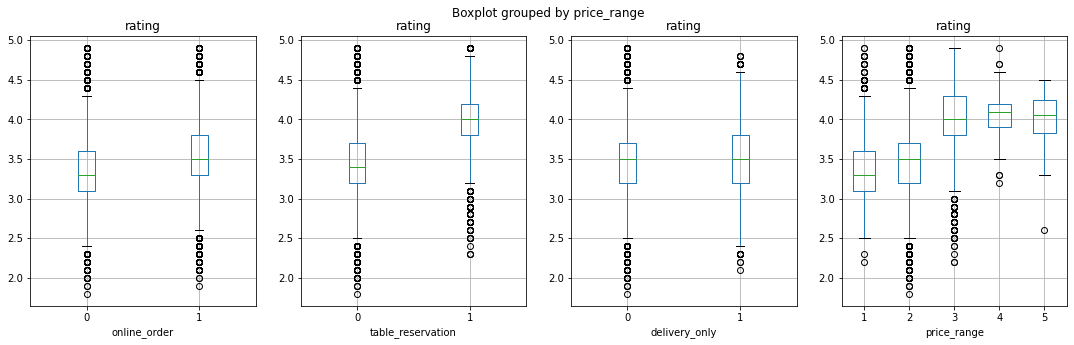

In [39]:
# Box plots for Categorical Target Variable "Rating" and continuous predictors
CategoricalColsList=['online_order', 'table_reservation', 'delivery_only','price_range']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Rating"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    ind_hotels.boxplot(column='rating', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])


In this data, all three categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

#### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
ANOVA Test result: Probability of H0 being true

In [29]:
# An ANOVA tests the relationship between a categorical and a numeric variable
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway #for multidimen input array

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [30]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['online_order', 'table_reservation', 'delivery_only','price_range']
FunctionAnova(inpData=ind_hotels, 
              TargetVariable='rating', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

online_order is correlated with rating | P-Value: 0.0
table_reservation is correlated with rating | P-Value: 0.0
delivery_only is correlated with rating | P-Value: 2.813541376414967e-13
price_range is correlated with rating | P-Value: 0.0


['online_order', 'table_reservation', 'delivery_only', 'price_range']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable. This is something we guessed by looking at the box plots!

##### Final selected Categorical columns:

'online_order', 'table_reservation', 'delivery_only','price_range'

# Selecting final predictors for Machine Learning

##### Based on the above tests, selecting the final columns for machine learning

In [31]:
SelectedColumns=['rating','rating_count', 'cost','online_order', 'table_reservation', 'delivery_only','price_range']

# Selecting final columns
DataForML=ind_hotels[SelectedColumns]
DataForML.head()

,rating,rating_count,cost,online_order,table_reservation,delivery_only,price_range
1,3.9,46,40.0,0,0,0,1
2,3.3,6,40.0,0,0,0,2
4,3.7,33,50.0,0,0,0,1
5,3.3,14,50.0,1,0,0,1
6,3.9,122,50.0,0,0,0,1


In [32]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [33]:
# Printing all the column names for our reference
DataForML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114223 entries, 1 to 162912
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             114223 non-null  float64
 1   rating_count       114223 non-null  int32  
 2   cost               114223 non-null  float64
 3   online_order       114223 non-null  int64  
 4   table_reservation  114223 non-null  int64  
 5   delivery_only      114223 non-null  int32  
 6   price_range        114223 non-null  int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 9.7 MB


#### Machine Learning: Splitting the data into Training and Testing sample

In [34]:
# Printing all the column names for our reference
DataForML.columns

Index(['rating', 'rating_count', 'cost', 'online_order', 'table_reservation',
       'delivery_only', 'price_range'],
      dtype='object')

In [35]:
# Separate Target Variable and Predictor Variables
TargetVariable='rating'
# Predictors=['cost','rating_count','online_order',
#            'table_reservation', 'delivery_only','price_range']
Predictors=['cost','rating_count','price_range']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456)

#### Standardization/Normalization of data

In [36]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(79956, 3)
(79956,)
(34267, 3)
(34267,)


#### Multiple Linear Regression

In [38]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.17009785990798654

##### Model Validation and Accuracy Calculations ##########
   rating  Predictedrating
0     3.3              3.0
1     3.5              3.0
2     4.1              4.0
3     3.4              3.0
4     3.0              3.0
Mean Accuracy on test data: 88.47797783920242
Median Accuracy on test data: 88.8888888888889

Accuracy values for 10-fold Cross Validation:
 [91.93444105 91.92580343 91.80710516 91.64520072 91.25302912 90.790013
 91.06217884 90.94624624 90.40157822 91.15382429]

Final Average Accuracy of the model: 91.29


#### Decision Trees

In [39]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

DecisionTreeRegressor(criterion='mse', max_depth=6)
R2 Value: 0.4498180806612625

##### Model Validation and Accuracy Calculations ##########
   rating  Predictedrating
0     3.3              4.0
1     3.5              3.0
2     4.1              4.0
3     3.4              3.0
4     3.0              3.0
Mean Accuracy on test data: 90.00518474947854
Median Accuracy on test data: 91.8918918918919

Accuracy values for 10-fold Cross Validation:
 [94.74365166 94.67293924 94.20239351 93.61858842 93.4018837  92.95690923
 93.07678408 93.11787328 91.945471   93.62848278]

Final Average Accuracy of the model: 93.54


#### Random Forest¶


In [40]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=700,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))


###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

RandomForestRegressor(criterion='mse', max_depth=4, n_estimators=700)
R2 Value: 0.44385970834812294

##### Model Validation and Accuracy Calculations ##########
   rating  Predictedrating
0     3.3              4.0
1     3.5              3.0
2     4.1              4.0
3     3.4              3.0
4     3.0              3.0
Mean Accuracy on test data: 89.92411139198899
Median Accuracy on test data: 91.8918918918919

Accuracy values for 10-fold Cross Validation:
 [94.64095965 94.63339123 94.22497113 93.66757586 93.43566238 92.98382197
 93.13859557 93.19117555 91.88622933 93.58072207]

Final Average Accuracy of the model: 93.54


#### AdaBoost


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=500)
R2 Value: 0.3404966426682362

##### Model Validation and Accuracy Calculations ##########
   rating  Predictedrating
0     3.3              3.0
1     3.5              3.0
2     4.1              4.0
3     3.4              3.0
4     3.0              3.0
Mean Accuracy on test data: 89.42884292192427
Median Accuracy on test data: 90.9090909090909

Accuracy values for 10-fold Cross Validation:
 [93.98408978 93.97002039 93.7489815  93.21304788 92.6260634  92.19155287
 91.91935191 91.86772824 91.10291913 92.74069779]

Final Average Accuracy of the model: 92.74


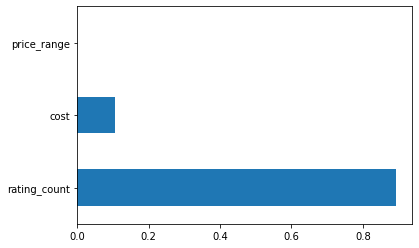

In [41]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#### XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=None, tree_method=None, validate_parameters=None,
             verbosity=None)
[13:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.45752131736385593

##### Model Validation and Accuracy Calculations ##########
   rating  Predict

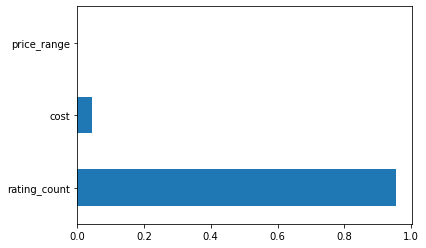

In [42]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#### KNN

In [43]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.3978312132321282

##### Model Validation and Accuracy Calculations ##########
   rating  Predictedrating
0     3.3              4.0
1     3.5              3.0
2     4.1              4.0
3     3.4              4.0
4     3.0              3.0
Mean Accuracy on test data: 89.19770974722947
Median Accuracy on test data: 90.9090909090909

Accuracy values for 10-fold Cross Validation:
 [93.7936806  93.53259379 93.16587749 92.55132364 92.01474638 91.62985843
 91.55185549 91.98729018 91.14337735 92.70439595]

Final Average Accuracy of the model: 92.41


#### SVM

In [44]:
# # Support Vector Machines(SVM)
# from sklearn import svm
# RegModel = svm.SVR(C=5, kernel='rbf', degree=20, gamma=0.01)

# # Printing all the parameters
# print(RegModel)

# # Creating the model on Training Data
# SVM=RegModel.fit(X_train,y_train)
# prediction=SVM.predict(X_test)

# from sklearn import metrics
# # Measuring Goodness of fit in Training data
# print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# ###########################################################################
# print('\n##### Model Validation and Accuracy Calculations ##########')

# # Printing some sample values of prediction
# TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
# TestingDataResults[TargetVariable]=y_test
# TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# # Printing sample prediction values
# print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# # Calculating the error for each row
# TestingDataResults['APE']=100 * ((abs(
#   TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])

# MAPE=np.mean(TestingDataResults['APE'])
# MedianMAPE=np.median(TestingDataResults['APE'])

# Accuracy =100 - MAPE
# MedianAccuracy=100- MedianMAPE
# print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
# print('Median Accuracy on test data:', MedianAccuracy)

# # Defining a custom function to calculate accuracy
# # Make sure there are no zeros in the Target variable if you are using MAPE
# def Accuracy_Score(orig,pred):
#     MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
#     #print('#'*70,'Accuracy:', 100-MAPE)
#     return(100-MAPE)

# # Custom Scoring MAPE calculation
# from sklearn.metrics import make_scorer
# custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# # Importing cross validation function from sklearn
# from sklearn.model_selection import cross_val_score

# # Running 10-Fold Cross validation on a given algorithm
# # Passing full data X and y because the K-fold will split the data and automatically choose train/test
# Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
# print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
# print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))